In [70]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import pytz
import gensim
from nltk.tokenize import TweetTokenizer
from keras.preprocessing.text import Tokenizer
import gc
import string
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from collections import Counter
import pickle
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None

In [2]:
all_files=os.listdir()
mentions=[_ for _ in all_files if _.__contains__("Mentions")]

In [3]:
len(mentions)

44

In [4]:
shows=pd.DataFrame()
for filename in mentions:
    try:
        data=pd.read_csv(filename,skiprows=5,parse_dates=[3],usecols=['Source','Link','Time(ET)','LocalTime','Authority','Gender','Country','Location','Assigned','Sentiment','Alexa Rank','Alexa Reach','Title','Snippet','Content','Unique ID','Language','Followers','Following','Summary','Viewed','Commented','Favourited','Rated'])
        data['showname']=filename.split(".")[0]
        shows=pd.concat([shows,data],axis=0)
    except e:
        print("filename {} with exception {}".format(filename,e))
        continue
 

S:\Anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
shows.shape

(827641, 25)

In [6]:
shows.head()

,Source,Link,Time(ET),LocalTime,Authority,Gender,Country,Location,Assigned,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,Viewed,Commented,Favourited,Rated,showname
0,TWITTER,http://twitter.com/ASHWANI11345063/statuses/10...,Oct 25 2018 23:29:56 EDT,2018-10-25 23:29:56,0,Male,NaN,NaN,none+,None,0,0,@ASHWANI11345063,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,23723083,TL,1,8,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions
1,INSTAGRAM,https://www.instagram.com/p/BpXjXNVC03A/,Oct 25 2018 15:34:56 EDT,2018-10-25 15:34:56,0,NaN,BG,Sofia;-42;-Bulgaria,none+,Positive,0,0,dabh_big_fan_bulgaria,"Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...","Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...",23709925,EN,0,0,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions
2,INSTAGRAM,https://www.instagram.com/p/BpXjSZsiXa5/,Oct 25 2018 15:34:17 EDT,2018-10-25 15:34:17,0,NaN,BG,Sofia;-42;-Bulgaria,none+,Positive,0,0,dabh_big_fan_bulgaria,"Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...","Ayush Anand in ,,Perfect Pati"" 25/10/18 Episod...",23709924,EN,0,0,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions
3,INSTAGRAM,https://www.instagram.com/p/BpXJdcBFcCf/,Oct 25 2018 11:53:50 EDT,2018-10-25 11:53:50,0,NaN,ZZ,NaN,none+,None,0,0,perfectpati__,#perfectpati #episode 3 When #pushkar #comes #...,#perfectpati #episode 3 When #pushkar #comes #...,23693611,English,0,0,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions
4,INSTAGRAM,https://www.instagram.com/p/BpWlo3JBniN/,Oct 25 2018 06:38:08 EDT,2018-10-25 06:38:08,0,NaN,ZZ,NaN,none+,Positive,0,0,jayaprada_unofficial,Everyone looking amazing #onlocation #shooting...,Everyone looking amazing #onlocation #shooting...,23667295,EN,0,0,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions


In [7]:
# a="zeetv-shows-tujhse-hai-rabta -Mentions.csv"
# a.split(".")[0]

In [8]:
# data=pd.read_csv("zeetv-shows-tujhse-hai-rabta -Mentions.csv",parse_dates=[3],skiprows=5,usecols=['Source','Link','Time(ET)','LocalTime','Authority','Gender','Country','Location','Assigned','Sentiment','Alexa Rank','Alexa Reach','Title','Snippet','Content','Unique ID','Language','Followers','Following','Summary','Viewed','Commented','Favourited','Rated'])


In [9]:
# ,date_parser=lambda x:dt.datetime.strptime(x,"%b %d %Y %H:%M:%S %z")

In [10]:
showrename={
    'zeetv---show---kaleerein 2-Mentions':'zeetv---show---kaleerein -Mentions',
    'zee-tv---show---juzzbaaat 2-Mentions':'zee-tv---show---juzzbaaat-Mentions',
    'sony-tv-show-indian-idol 1-Mentions':'sony-tv-show-indian-idol -Mentions',
    'sony-tv-show-indian-idol 2-Mentions':'sony-tv-show-indian-idol -Mentions',
    'sony-tv-show-indian-idol 3-Mentions':'sony-tv-show-indian-idol -Mentions',
    'sony-tv-show-dus-ka-dum 1-Mentions':'sony-tv-show-dus-ka-dum -Mentions',
    'sony-tv-show-dus-ka-dum 2-Mentions':'sony-tv-show-dus-ka-dum -Mentions',
    'sony-tv-show-dus-ka-dum 3-Mentions':'sony-tv-show-dus-ka-dum -Mentions',
    'colors-tv-show-naagin3 1-Mentions':'colors-tv-show-naagin3 -Mentions',
    'colors-tv-show-naagin3 2-Mentions':'colors-tv-show-naagin3 -Mentions',
    'colors-tv-show-naagin3 3-Mentions':'colors-tv-show-naagin3 -Mentions'
}

In [11]:
shows['new_name']=shows['showname']
for x,y in showrename.items():
    shows.loc[shows.showname==x,'new_name']=y

In [12]:
shows[shows.Source=='TWITTER'].groupby(['new_name'])['showname'].count()

new_name
andtv-show-perfect-pati-Mentions                               282
andtvofficial-show-bitti-businesswali-Mentions               43447
andtvofficial-show-high-fever-Mentions                        1693
andtvofficial-show-laal-ishq-Mentions                          115
andtvofficial-show-love-me-india-Mentions                    18649
andtvofficial-show-mitegi-lakshmanrekha-Mentions               672
andtvofficial-show-vikram-betaal-Mentions                     2444
colors-tv---show--dance-deewane-Mentions                     44154
colors-tv-show-dastan-e-mohabbat-Mentions                     2247
colors-tv-show-naagin3 -Mentions                             66098
colors-tv-show-rising-star-Mentions                           4343
colorstv-show-dev2-Mentions                                   4724
colorstv-show-internet-wala-love-Mentions                     3802
colorstv-show-kasam-Mentions                                 24201
colorstv-show-kaun-hai-Mentions                      

In [13]:
twitter=shows[shows.Source=='TWITTER']

In [14]:
twitter['original_tweet']=~twitter.Content.str.startswith(('RT','QT'))

S:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
twitter.head()

,Source,Link,Time(ET),LocalTime,Authority,Gender,Country,Location,Assigned,Sentiment,Alexa Rank,Alexa Reach,Title,Snippet,Content,Unique ID,Language,Followers,Following,Summary,Viewed,Commented,Favourited,Rated,showname,new_name,original_tweet
0,TWITTER,http://twitter.com/ASHWANI11345063/statuses/10...,Oct 25 2018 23:29:56 EDT,2018-10-25 23:29:56,0,Male,NaN,NaN,none+,None,0,0,@ASHWANI11345063,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,@AndTVOfficial YE JO PERFECT PATI KA SHOW HAI ...,23723083,TL,1,8,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True
5,TWITTER,http://twitter.com/P_Madhumita/statuses/105540...,Oct 25 2018 06:22:06 EDT,2018-10-25 06:22:06,5,Male,NaN,NaN,none+,None,0,0,@P_Madhumita,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...","RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...",23665380,ID,264,82,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,False
7,TWITTER,http://twitter.com/Rohiths2001/statuses/105538...,Oct 25 2018 05:13:10 EDT,2018-10-25 05:13:10,1,NaN,IN,;-;-India,none+,None,0,0,@Rohiths2001,"RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...","RT @isalilsand: #AndTV: #Agnifera 0.2, #Vikram...",23660437,ID,16,98,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,False
8,TWITTER,http://twitter.com/veekay_ness/statuses/105538...,Oct 25 2018 05:02:06 EDT,2018-10-25 05:02:06,3,Male,IN,mumbai;-maharashtra;-India,none+,Positive,0,0,@veekay_ness,RT @GossipsTv: #SuperExclusive #TRP #TRPDay @A...,RT @GossipsTv: #SuperExclusive #TRP #TRPDay @A...,23659646,EN,67,659,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,False
9,TWITTER,http://twitter.com/GossipsTv/statuses/10553797...,Oct 25 2018 04:45:25 EDT,2018-10-25 04:45:25,7,NaN,IN,mumbai;-maharashtra;-India,none+,Positive,0,0,@GossipsTv,#SuperExclusive #TRP #TRPDay @AndTVOfficial Al...,#SuperExclusive #TRP #TRPDay @AndTVOfficial Al...,23658245,EN,3596,44,NaN,0,0,0,0,andtv-show-perfect-pati-Mentions,andtv-show-perfect-pati-Mentions,True


In [16]:
twitter[twitter.original_tweet].groupby('new_name')['new_name'].count()

new_name
andtv-show-perfect-pati-Mentions                              132
andtvofficial-show-bitti-businesswali-Mentions              17773
andtvofficial-show-high-fever-Mentions                        339
andtvofficial-show-laal-ishq-Mentions                          12
andtvofficial-show-love-me-india-Mentions                    4096
andtvofficial-show-mitegi-lakshmanrekha-Mentions              156
andtvofficial-show-vikram-betaal-Mentions                     517
colors-tv---show--dance-deewane-Mentions                     9194
colors-tv-show-dastan-e-mohabbat-Mentions                     312
colors-tv-show-naagin3 -Mentions                            15729
colors-tv-show-rising-star-Mentions                           406
colorstv-show-dev2-Mentions                                   609
colorstv-show-internet-wala-love-Mentions                    1352
colorstv-show-kasam-Mentions                                 5162
colorstv-show-kaun-hai-Mentions                               201
c

In [17]:
kaliren=twitter[twitter.new_name=='zeetv---show---kaleerein -Mentions']

In [18]:
kaliren_unique=kaliren[kaliren.original_tweet][['Snippet','Unique ID']].reset_index(drop=True)

In [19]:
unique_tweets=kaliren_unique.Snippet.unique()

In [20]:
len(unique_tweets)

34109

In [21]:
def tokens(tweets):
    tweets=tweets.lower()
    tokens=tokenizer.tokenize(tweets)
    tokens=filter(lambda x:not x.startswith('http'),tokens)
    return list(tokens)

In [22]:
tokenizer=TweetTokenizer()
# tweets_tokens=kaliren_unique.Snippet.str.lower().map(tokens)
tweets_tokens=[tokens(x) for x in unique_tweets ]

In [23]:
gc.collect()

0

In [24]:
model=Word2Vec(tweets_tokens,size=100,min_count=1)
model.train(tweets_tokens,total_examples=len(tweets_tokens),epochs=10)

(5133053, 7271540)

In [27]:
model.save("w2vKalee.model")

In [21]:
model=Word2Vec.load('w2vKalee.model')

In [22]:
model.wv['star']

array([ 0.17022827,  0.41265997,  0.39156753, -0.17419119,  0.03105946,
       -0.07425688, -0.16045585,  0.37290037, -0.13066058, -0.4376429 ,
       -0.25304618, -0.08648647, -0.13498624, -0.08296011, -0.14072314,
        0.1853159 ,  0.08783796, -0.00763556, -0.11367326, -0.07053746,
        0.3567094 , -0.15683697,  0.22342476,  0.17541909, -0.3484576 ,
        0.45780668, -0.18103787,  0.06658547, -0.16353628,  0.27699643,
       -0.24163666, -0.18503667, -0.07007273, -0.07297344, -0.15405002,
       -0.13793245,  0.17372137, -0.51701814,  0.3379973 ,  0.2563368 ,
        0.39088097,  0.07031162,  0.12068453, -0.07248947, -0.18601675,
       -0.1533174 ,  0.26222235,  0.17038557,  0.21163014, -0.09909291,
        0.18865402, -0.04213833,  0.36807108, -0.17675424,  0.03129102,
       -0.26566675, -0.11754677,  0.21891542, -0.46015903, -0.24915163,
       -0.03227029,  0.01575656,  0.3485169 , -0.00347194,  0.04755858,
       -0.15233818, -0.28443915, -0.31261158, -0.00374656,  0.13

In [23]:
model.wv.most_similar('story',topn=15)

[('tale', 0.5867917537689209),
 ('concept', 0.5642212629318237),
 ('journey', 0.556221604347229),
 ('show', 0.5202246308326721),
 ('idea', 0.4810567796230316),
 ('rage', 0.4729345440864563),
 ('part', 0.4451940059661865),
 ('character', 0.44275423884391785),
 ('serial', 0.43233758211135864),
 ('initiative', 0.432299941778183),
 ('narrative', 0.42512255907058716),
 ('fierce', 0.419236958026886),
 ('symbol', 0.40781569480895996),
 ('inspiring', 0.4060932695865631),
 ('one', 0.40598568320274353)]

In [31]:
keyed=model.wv
del model

In [32]:
keyed.most_similar('wedding')

[('includes', 0.6104772090911865),
 ('shopping', 0.5652444958686829),
 ('destinations', 0.5061044692993164),
 ('handbell', 0.5004119873046875),
 ('foods', 0.4753000736236572),
 ('left', 0.4654073417186737),
 ('deleting', 0.463539719581604),
 ('marrige', 0.4615934491157532),
 ('hour', 0.4596536457538605),
 ('hectic', 0.4560714662075043)]

In [ ]:
keyed.most_similar('')

In [33]:
embeddings=np.zeros(shape=(len(unique_tweets),100))
for i,tweet in enumerate(tweets_tokens):
    sm=0
    for word in tweet:
        try:
            embeddings[i]+=keyed[word]
        except KeyError:
            print(tweet)
    embeddings[i]=embeddings[i]/len(tweet)

In [23]:
with open("embeddings",'rb') as fr:
    embeddings=pickle.load(fr)

In [129]:
# km=KMeans(n_clusters=8,n_jobs=-1)
# km.fit(embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
# Counter(km.labels_)

Counter({0: 6944,
         1: 1264,
         2: 6700,
         3: 4489,
         4: 1822,
         5: 5239,
         6: 6419,
         7: 1232})

In [24]:
def fit_clusters(clf):
    clus={}
    clf.fit(embeddings)
    clus['labels']=pd.Series(clf.labels_)
    clus['score']=clf.inertia_
#     clus['cls']=clf
    clus['centroids']=clf.cluster_centers_
    return clus

In [25]:
def create_clusters(rng):
    cluster_file=pd.DataFrame({'tweets':unique_tweets})
    scores=[]
    centers=[]
    for i in rng:
        km=KMeans(n_clusters=i,n_jobs=-1)
        clus=fit_clusters(km)
        scores.append(clus['score'])
        cluster_file['cluster_{}'.format(i)]=clus['labels']
        centers.append(clus['centroids'])
        del km
        del clus
        gc.collect()
    return cluster_file,scores,centers
        

In [26]:
cluster_tweet,scores,centers=create_clusters(np.arange(2,14))

In [27]:
scores

[550980.0852779204,
 463842.8886799092,
 406921.13761485287,
 374873.77223104605,
 352201.7904743624,
 340622.3635189696,
 330277.0439817236,
 322365.24481563154,
 315624.2301520593,
 308802.74567448883,
 303500.5465277474,
 298214.26851262525]

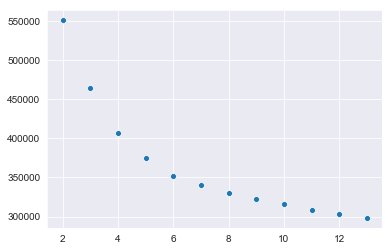

In [31]:
sns.scatterplot(x=np.arange(2,14),y=scores)

In [137]:
# with open("embeddings",'wb') as fw:
#     pickle.dump(embeddings,fw)

In [32]:
cluster_tweet.head()

,tweets,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13
0,#TelanganaSamethalu #TeluguSamethalu Introduct...,0,0,2,2,1,5,7,6,6,8,9,11
1,#TelanganaSamethalu #TeluguSamethalu ఉసురు ఉంట...,0,0,2,2,1,5,1,6,7,5,11,12
2,"Dekhiye Meera aur Vivaan in Series Naya, First...",0,0,2,2,1,5,1,4,3,4,3,4
3,"Dekhiye Meera aur Vivaan in Series Naya, First...",0,0,2,2,1,5,1,4,3,4,3,4
4,I refuse to allow myself to be dictated to by ...,0,2,0,1,5,4,0,3,9,7,7,5


In [33]:
centers[4].shape

(6, 100)

In [60]:
def top5comments(centers,nbrs,filename=None):
    nn=NearestNeighbors(n_neighbors=nbrs,algorithm='auto')
    nn.fit(embeddings)
    _,nearest=nn.kneighbors(centers)
    cluster=centers.shape[0]
    df=cluster_tweet[['tweets','cluster_{}'.format(int(cluster))]]
    df=df.iloc[nearest.ravel(),:]
    if filename is not None:
        df.to_csv("{}.csv".format(filename),index=False,encoding='utf-8')
    return df,nearest
gc.collect()

56

In [61]:
df,nearest=top5comments(centers[4],15,"cluster_6")

In [62]:
Counter(cluster_tweet.cluster_6)

Counter({0: 9135, 1: 2365, 2: 5021, 3: 8603, 4: 1264, 5: 7721})

### Count vs ratings plot

In [90]:
initial_time=twitter.groupby('new_name')['LocalTime'].min().to_frame()

In [91]:
initial_time['max_date']=initial_time.LocalTime + dt.timedelta(days=28)

In [92]:
initial_time.reset_index(drop=False,inplace=True)

In [93]:
shows_max=twitter.merge(initial_time[['new_name','max_date']],on='new_name',how='left')

In [137]:
shows_max[shows_max.LocalTime<=shows_max.max_date].groupby('new_name')['Unique ID'].nunique()

new_name
andtv-show-perfect-pati-Mentions                              140
andtvofficial-show-bitti-businesswali-Mentions                242
andtvofficial-show-high-fever-Mentions                        992
andtvofficial-show-laal-ishq-Mentions                         107
andtvofficial-show-love-me-india-Mentions                   15174
andtvofficial-show-mitegi-lakshmanrekha-Mentions              672
andtvofficial-show-vikram-betaal-Mentions                    1910
colors-tv---show--dance-deewane-Mentions                    42522
colors-tv-show-dastan-e-mohabbat-Mentions                    1436
colors-tv-show-naagin3 -Mentions                            35756
colors-tv-show-rising-star-Mentions                          3730
colorstv-show-dev2-Mentions                                  3130
colorstv-show-internet-wala-love-Mentions                    2592
colorstv-show-kasam-Mentions                                14330
colorstv-show-kaun-hai-Mentions                              1145
c

In [98]:
weeks4=shows_max[shows_max.LocalTime<=shows_max.max_date]
weeks4=weeks4[weeks4.original_tweet]

In [99]:
showcnt=weeks4.groupby('new_name')['Content'].nunique().to_frame()

In [96]:
initial_time.head()

,new_name,LocalTime,max_date
0,andtv-show-perfect-pati-Mentions,2018-08-25 03:29:36,2018-09-22 03:29:36
1,andtvofficial-show-bitti-businesswali-Mentions,2018-05-06 09:57:34,2018-06-03 09:57:34
2,andtvofficial-show-high-fever-Mentions,2018-03-11 00:23:24,2018-04-08 00:23:24
3,andtvofficial-show-laal-ishq-Mentions,2018-06-18 02:55:26,2018-07-16 02:55:26
4,andtvofficial-show-love-me-india-Mentions,2018-09-16 00:10:07,2018-10-14 00:10:07


In [100]:
weeks4.groupby('new_name')['LocalTime'].max()

new_name
andtv-show-perfect-pati-Mentions                           2018-09-21 10:25:03
andtvofficial-show-bitti-businesswali-Mentions             2018-06-02 14:11:11
andtvofficial-show-high-fever-Mentions                     2018-04-08 00:16:31
andtvofficial-show-laal-ishq-Mentions                      2018-07-08 04:10:03
andtvofficial-show-love-me-india-Mentions                  2018-10-13 23:51:40
andtvofficial-show-mitegi-lakshmanrekha-Mentions           2018-07-20 18:39:06
andtvofficial-show-vikram-betaal-Mentions                  2018-11-06 08:06:19
colors-tv---show--dance-deewane-Mentions                   2018-06-24 01:16:48
colors-tv-show-dastan-e-mohabbat-Mentions                  2018-10-21 00:47:25
colors-tv-show-naagin3 -Mentions                           2018-07-14 23:50:44
colors-tv-show-rising-star-Mentions                        2018-02-11 00:15:13
colorstv-show-dev2-Mentions                                2018-07-14 09:46:04
colorstv-show-internet-wala-love-Mentions  

In [101]:
weeks4.shape,shows.shape

((112905, 28), (827641, 26))

In [32]:
ratings=pd.read_csv("subset_rating.csv")

In [38]:
ratings.groupby('new_name').max().to_csv('groupedrating.csv')

In [102]:
fratings=pd.read_csv("first_6_rating.csv")

In [103]:
fratings.head()

,new_name,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,w31,w32,w33,w34,w35,w36,w37,w38,w39,w40,w41,w42
0,andtv-show-perfect-pati-Mentions,0.29,0.24,0.20,0.26,0.23,0.27,0.24,0.25,0.30,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,andtvofficial-show-bitti-businesswali-Mentions,0.13,0.10,0.09,0.10,0.11,0.09,0.08,0.09,0.08,0.10,0.11,0.13,0.11,0.10,0.12,0.09,0.12,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,andtvofficial-show-high-fever-Mentions,0.57,0.29,0.46,0.34,0.32,0.34,0.32,0.34,0.28,0.40,0.24,0.20,0.22,0.21,0.37,0.24,0.22,0.27,0.27,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,andtvofficial-show-laal-ishq-Mentions,0.31,0.23,0.18,0.20,0.22,0.21,0.28,0.32,0.23,0.21,0.25,0.26,0.23,0.25,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,andtvofficial-show-love-me-india-Mentions,0.67,0.50,0.47,0.52,0.49,0.41,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
first4=fratings.set_index('new_name')[['w1','w2','w3','w4']]

In [105]:
showcnt.head()

,Content
new_name,
andtv-show-perfect-pati-Mentions,74
andtvofficial-show-bitti-businesswali-Mentions,113
andtvofficial-show-high-fever-Mentions,194
andtvofficial-show-laal-ishq-Mentions,8
andtvofficial-show-love-me-india-Mentions,3029


In [106]:
avg4ratings=first4.mean(axis='columns')

In [107]:
showcnt_mrgd=showcnt.merge(avg4ratings.to_frame(),how='left',left_index=True,right_index=True)

In [108]:
showcnt_mrgd.columns=['count','rating']

In [109]:
showcnt_subset=showcnt_mrgd[showcnt_mrgd.index.str.startswith(('zee','and'))]

In [114]:
showcnt_subset.head(20)

,count,rating
new_name,,
andtv-show-perfect-pati-Mentions,74,0.2475
andtvofficial-show-bitti-businesswali-Mentions,113,0.1050
andtvofficial-show-high-fever-Mentions,194,0.4150
andtvofficial-show-laal-ishq-Mentions,8,0.2300
andtvofficial-show-love-me-india-Mentions,3029,0.5400
andtvofficial-show-mitegi-lakshmanrekha-Mentions,154,0.1600
andtvofficial-show-vikram-betaal-Mentions,374,0.3475
zee-tv---show---ishq-subhan-allah-Mentions,4610,1.9550
zee-tv---show---juzzbaaat-Mentions,7419,0.2500


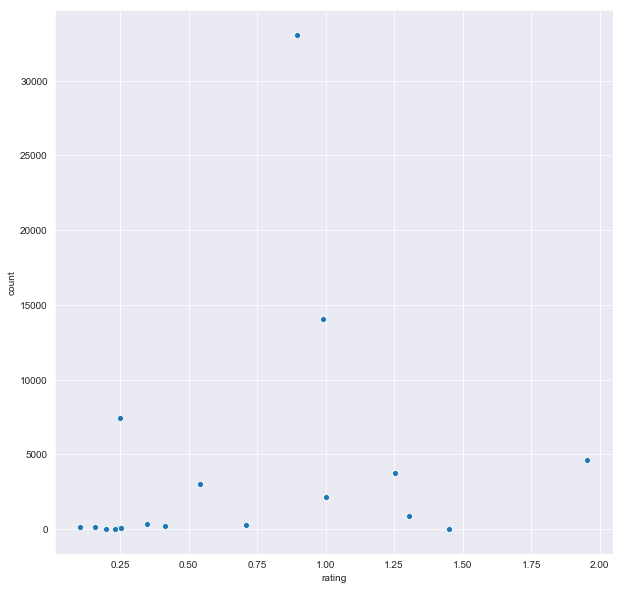

In [122]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(y='count',x='rating',data=showcnt_subset,ax=ax)
fig.savefig('')

In [135]:
showcnt_subset.loc[~showcnt_subset.index.isin(['zeetv---show---kaleerein -Mentions','zeetv-show-aap-ke-aa-jane-se-Mentions','zee-tv---show---juzzbaaat-Mentions']),:]

,count,rating
new_name,,
andtv-show-perfect-pati-Mentions,74,0.2475
andtvofficial-show-bitti-businesswali-Mentions,113,0.1050
andtvofficial-show-high-fever-Mentions,194,0.4150
andtvofficial-show-laal-ishq-Mentions,8,0.2300
andtvofficial-show-love-me-india-Mentions,3029,0.5400
andtvofficial-show-mitegi-lakshmanrekha-Mentions,154,0.1600
andtvofficial-show-vikram-betaal-Mentions,374,0.3475
zee-tv---show---ishq-subhan-allah-Mentions,4610,1.9550
zee-tv-shows-fear-files-Mentions,296,0.7100


In [132]:
showcnt_subset.index

Index(['andtv-show-perfect-pati-Mentions',
       'andtvofficial-show-bitti-businesswali-Mentions',
       'andtvofficial-show-high-fever-Mentions',
       'andtvofficial-show-laal-ishq-Mentions',
       'andtvofficial-show-love-me-india-Mentions',
       'andtvofficial-show-mitegi-lakshmanrekha-Mentions',
       'andtvofficial-show-vikram-betaal-Mentions',
       'zee-tv---show---ishq-subhan-allah-Mentions',
       'zee-tv---show---juzzbaaat-Mentions',
       'zee-tv-shows-fear-files-Mentions',
       'zeetv---show---kaleerein -Mentions',
       'zeetv-show-aap-ke-aa-jane-se-Mentions',
       'zeetv-show-did-lil-masters-Mentions',
       'zeetv-show-ye-teri-galiyan-Mentions',
       'zeetv-shows-india-best-dramebaaz-Mentions',
       'zeetv-shows-maggie-kitchen-journeys-Mentions',
       'zeetv-shows-sa-re-ga-ma-pa-Mentions',
       'zeetv-shows-tujhse-hai-rabta -Mentions'],
      dtype='object', name='new_name')

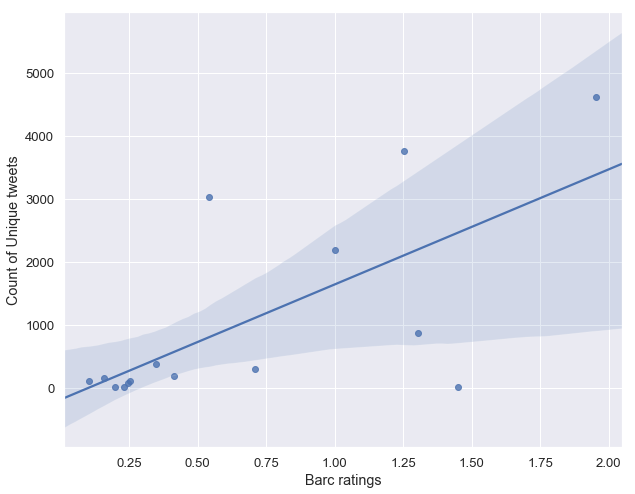

In [136]:
sns.set(font_scale=1.2)
fig,ax=plt.subplots(figsize=(10,8))
sns.regplot(y='count',x='rating',data=showcnt_subset.loc[~showcnt_subset.index.isin(['zeetv---show---kaleerein -Mentions','zeetv-show-aap-ke-aa-jane-se-Mentions','zee-tv---show---juzzbaaat-Mentions']),:],ax=ax)
ax.set(xlabel='Barc ratings',ylabel='Count of Unique tweets')
fig.savefig("reg_excluding_Kalirn_App.png")

In [ ]:
sns.set(font_scale=1.2)
fig,ax=plt.subplots(figsize=(10,8))
regplot=sns.regplot(y='count',x='rating',data=showcnt_subset[],ax=ax)
ax.set(xlabel='Barc ratings',ylabel='Count of Unique tweets')
fig.savefig("reg.png")